The Sparks Foundation
 Name: Renuka Devi Bommisetty
 Email: renukasreenivas56@gmail.com
 Domain: Data Science And Business Analytics
 Task-4: Exploratory Data Analysis-Terrorism

# Importing Data

In [1]:
import pyforest

In [2]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")
data.head(3)

<IPython.core.display.Javascript object>

C:\Users\RENUKA SREENIVAS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.tail(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
data.index

RangeIndex(start=0, stop=181691, step=1)

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [8]:
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [9]:
data.count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#correlation matrix
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [13]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [14]:
data=data.drop(["approxdate","related"],axis=1)

In [15]:
data.isnull().sum()

eventid     0
iyear       0
imonth      0
iday        0
extended    0
           ..
dbsource    0
INT_LOG     0
INT_IDEO    0
INT_MISC    0
INT_ANY     0
Length: 133, dtype: int64

# Univariate Analysis

In [16]:
data["country"].value_counts().count()

205

In [17]:
data["dbsource"].value_counts()

START Primary Collection                    78002
PGIS                                        63740
ISVG                                        17207
CETIS                                       16163
CAIN                                         1588
UMD Schmid 2012                              1165
Hewitt Project                               1005
UMD Algeria 2010-2012                         848
UMD South Africa                              449
UMD Sri Lanka 2011                            405
UMD Miscellaneous                             259
Anti-Abortion Project 2010                    186
Eco Project 2010                              147
UMD JTMM Nepal 2012                           104
HSI                                            97
Hyland                                         71
Hijacking DB                                   54
UMD Encyclopedia of World Terrorism 2012       48
CBRN Global Chronology                         46
Armenian Website                               40


In [18]:
data["country_txt"].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Vatican City               1
New Hebrides               1
Antigua and Barbuda        1
St. Lucia                  1
Name: country_txt, Length: 205, dtype: int64

In [19]:
data["scite1"].value_counts()

Committee on Government Operations United States Senate, "Riots, Civil, and Criminal Disorders," U.S. Government Printing Office, August 6, 1970.    205
"ISIS detonates 5 empty homes in Daur using IEDs," Iraqi News, September 28, 2016.                                                                   106
"Iraq: Roundup of Security Incidents 18-24 March 2014," OSC Summary, March 25, 2014.                                                                  92
"Attack on 80 electricity towers in Anbar leaves 2 casualties," Iraqi News, December 1, 2016.                                                         80
Edward F. Mickolus, Terrorism, 1996-2001 : A Chronology, Imprint Westport, CT: Greenwood Press, 2002.                                                 77
                                                                                                                                                    ... 
"Economic think tank targeted in bomb attack," EFE News Service, March 19, 2001.  

In [20]:
data["scite1"].unique()

array([nan, '"Police Chief Quits," Washington Post, January 2, 1970.',
       'Committee on Government Operations United States Senate, "Riots, Civil, and Criminal Disorders," U.S. Government Printing Office, August 6, 1970.',
       ...,
       '"Maguindanao clashes trap tribe members," Philippines Daily Inquirer, January 3, 2018.',
       '"Trader escapes grenade attack in Imphal," Business Standard India, January 3, 2018.',
       '"Security tightened in Cotabato following IED discovery," Tempo, January 4, 2018.'],
      dtype=object)

In [21]:
data["scite2"].value_counts()

Christopher Hewitt, "Political Violence and Terrorism in Modern America: A Chronology," Praeger Security International, 2005.                                                                    134
"Iraq: Security Roundup 1900 GMT 27 September 2016," Summary, September 27, 2016.                                                                                                                100
"Attack on 80 electricity towers in Anbar leaves 2 casualties," Iraqi News, December 1, 2016.                                                                                                     63
"IS ignites sectarian tensions in multiple Iraq bombings," Middle East Eye, January 12, 2016.                                                                                                     43
"Motive sought for attacks in deep South," The Nation (Thailand), April 8, 2017.                                                                                                                  42
               

In [22]:
data["scite2"].unique()

array([nan,
       '"Cairo Police Chief Quits; Decries Local \'Militants\'," Afro-American, January 10, 1970.',
       'Christopher Hewitt, "Political Violence and Terrorism in Modern America: A Chronology," Praeger Security International, 2005.',
       ...,
       '"Highlights: Somalia Daily Media Highlights 2 January 2018," Summary, January 3, 2018.',
       '"Two Russian soldiers killed at Hmeymim base in Syria," Ansamed, January 4, 2018.',
       '"Security tightened in Cotabato City," Manila Bulletin, January 3, 2018.'],
      dtype=object)

In [23]:
data["scite3"].unique()

array([nan,
       'Christopher Hewitt, "Political Violence and Terrorism in Modern America: A Chronology," Praeger Security International, 2005.',
       'The Wisconsin Cartographers\' Guild, "Wisconsin\'s Past and Present: A Historical Atlas," The University of Wisconsin Press, 2002.',
       ...,
       '"Cop killed, 7 injured in Maguindanao IED blasts," Philippine Star, January 1, 2018.',
       '"Highlights: Somalia Daily Media Highlights 1 January 2018," Summary, January 2, 2018.',
       '"Two Russian servicemen killed in Syria mortar attack," Turkish Daily, January 4, 2018.'],
      dtype=object)

In [24]:
data["region"].value_counts()

10    50474
6     44974
3     18978
11    17550
8     16639
5     12485
2     10344
9      5144
1      3456
4       802
7       563
12      282
Name: region, dtype: int64

In [25]:
data["attacktype1"].unique()

array([1, 6, 3, 7, 2, 4, 9, 8, 5], dtype=int64)

In [26]:
data["success"].unique()

array([1, 0], dtype=int64)

In [27]:
data["country"].unique()

array([  58,  130,  160,   78,  101,  217,  218,   98,  499,   65,   83,
        222,  362,  199,  102,  185,   30,   60,   11,  110,   96,  209,
        158,   94,  603,   45,   26,  145,  142,   21,   38,   14,  153,
        230,  198,   49,  406,   36,   97,  161,  201,  156,  106,  155,
         15,  236,   92,   69,  428,   31,  604,  605,  162,    6,   61,
        205,   87,  195,  136,   53,  138,    4,  159,   43,   88,  235,
         59,  144,  121,  178,   29,  100,   42,  377,    7,  200,  184,
        215,  183,  104,   95,  182,  203,  186,  139,   17,  147,   20,
        207,   19,    8,  128,  173,   56,   93,  124,  403,  359,   55,
        349,   86,  137,  208,  213,  151,  111,   72,  113,   18,   89,
        174,  231,   84,   80,  532,   22,   81,  127,  221,    5,   41,
        176,   57,  164,   32,  196,  197,  116,   91,   70,   66,   33,
        143,  166,  146,  141,  204,   68,   67,   76,  122,  129,   90,
        108,  157,   44,  112,   47,  123,   75,  2

In [28]:
data["country_txt"].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [29]:
data["region"].unique()

array([ 2,  1,  5,  8,  4,  3,  9, 11, 10, 12,  6,  7], dtype=int64)

In [30]:
data["weaptype1"].unique()

array([13,  6,  8,  5,  2,  9, 11, 10,  7,  3, 12,  1], dtype=int64)

In [31]:
data["claimed"].value_counts()

 0.0    95091
 1.0    19006
-9.0     1474
Name: claimed, dtype: int64

In [32]:
data["hostkidoutcome"].unique()

array([nan,  2.,  5.,  4.,  3.,  7.,  6.,  1.])

In [33]:
#the attack on bangladesh has more number of preptators
data[data["nperps"]==data["nperps"].max()].set_index("nperps")

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
nperps,,,,,,,,,,,,,,,,,,,,,
25000.0,199409100003,1994,9,10,0,NaN,19,Bangladesh,6,South Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9


# DATA VISUALISATION

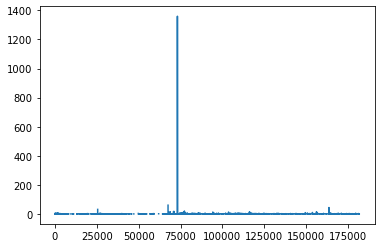

In [34]:
data.nkillus.plot()

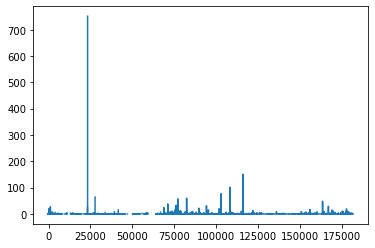

In [35]:
data.nwoundus.plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

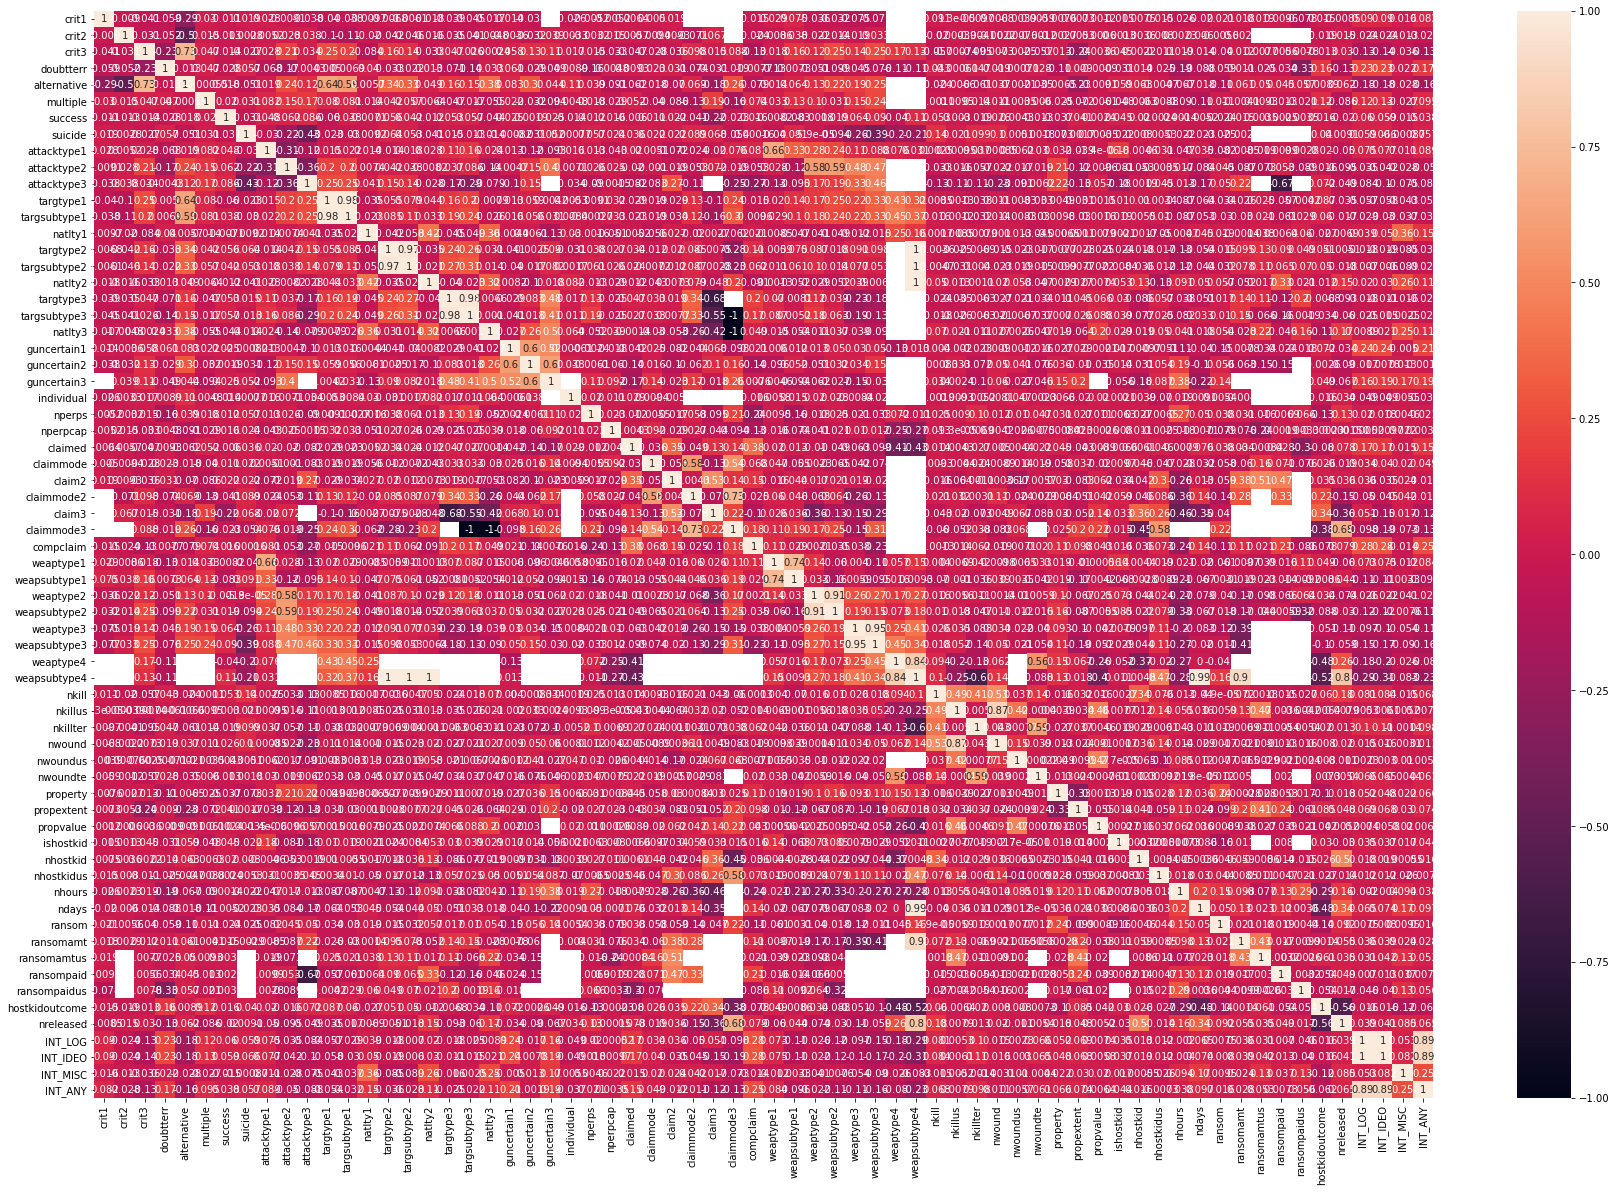

In [36]:
#heatmap of correlation
plt.figure(figsize=(30,20))
df=data.drop(["latitude","longitude","specificity"],axis=1)
df=df.iloc[15:,15:]
sns.heatmap(df.corr(),annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

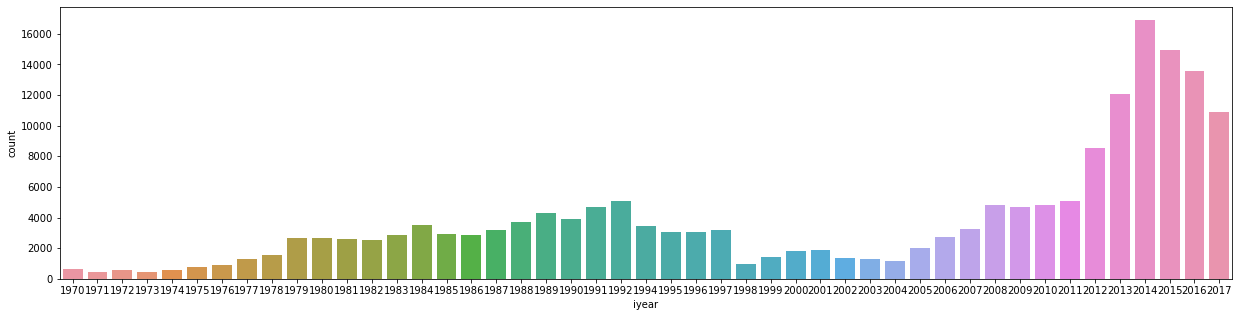

In [37]:
#Observation in number of events with years
plt.figure(figsize=(21,5))
sns.countplot(data["iyear"])

<IPython.core.display.Javascript object>

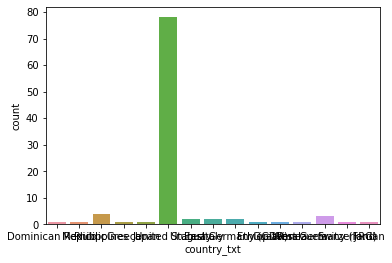

In [38]:
#plt.figure(figsize=(21,5))
sns.countplot(data["country_txt"].iloc[:100])

<IPython.core.display.Javascript object>

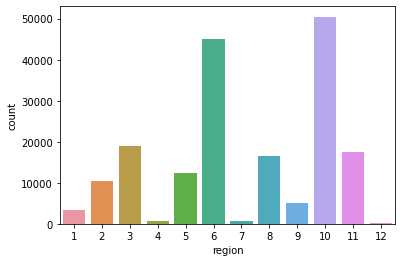

In [39]:
sns.countplot(data["region"])

in middle east and north africa regions have more incidents

<IPython.core.display.Javascript object>

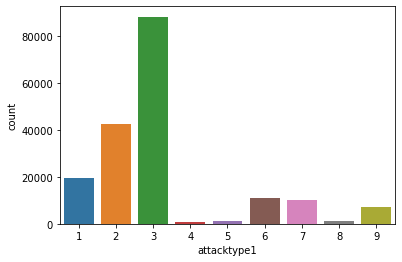

In [40]:
sns.countplot(data["attacktype1"])

bombing/Explosion attack type is more

<IPython.core.display.Javascript object>

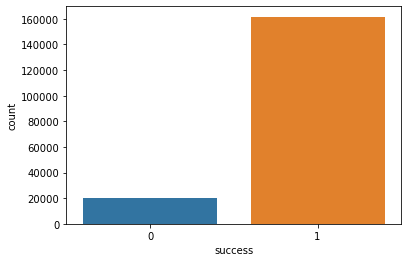

In [41]:
sns.countplot(data["success"])

most of the attacks are success

<IPython.core.display.Javascript object>

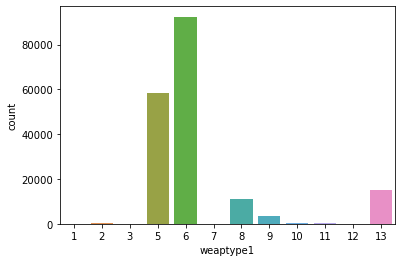

In [42]:
sns.countplot(data["weaptype1"])

explosives are the main weapons used for attacks

<IPython.core.display.Javascript object>

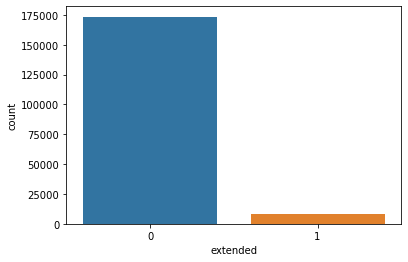

In [43]:
#incidents include more than 24 hrs or not
sns.countplot(data["extended"])

<IPython.core.display.Javascript object>

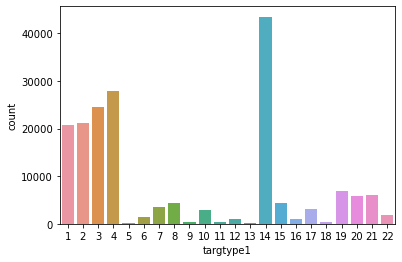

In [44]:
sns.countplot(data["targtype1"])

<IPython.core.display.Javascript object>

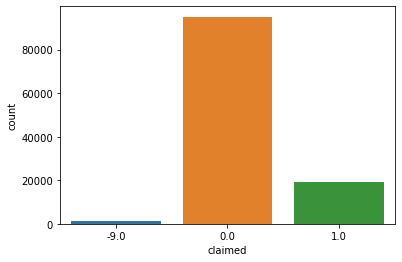

In [45]:
# most of the claims are not taken
sns.countplot(data["claimed"])

In [46]:
#number of events took after year 2000
events_after_2000=data[data["iyear"]>2000]
data[data["iyear"]>2000].shape

(110041, 133)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

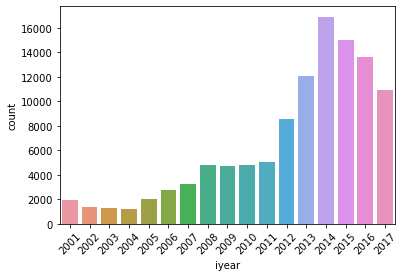

In [47]:
sns.countplot(events_after_2000["iyear"])
plt.xticks(rotation=45)

<IPython.core.display.Javascript object>

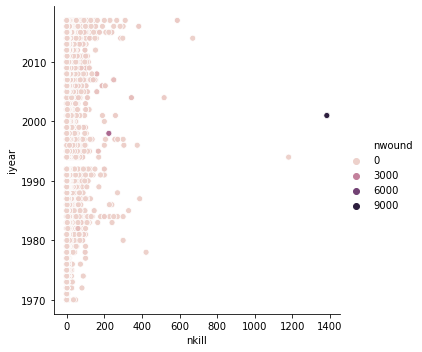

In [48]:
#number of persons killed and wounded in attack
sns.relplot(data=data,x="nkill",y="iyear",hue="nwound")

<IPython.core.display.Javascript object>

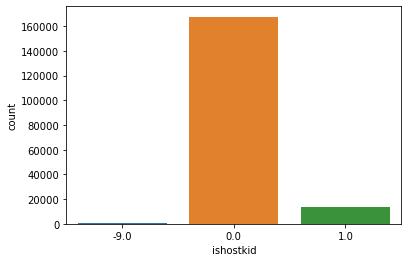

In [49]:
#number of events hostage happened
sns.countplot(data["ishostkid"])

<IPython.core.display.Javascript object>

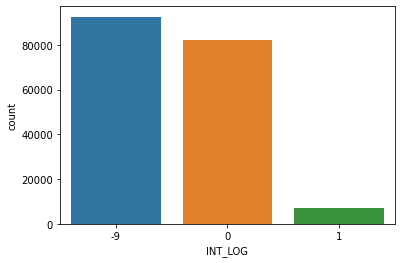

In [50]:
sns.countplot(data["INT_LOG"])

<IPython.core.display.Javascript object>

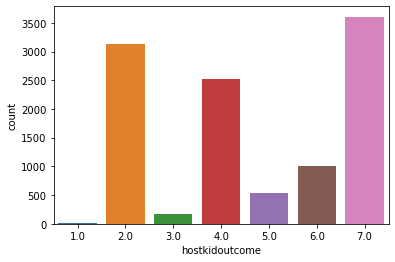

In [51]:
#number of hostages rescued or not
sns.countplot(data["hostkidoutcome"])

<IPython.core.display.Javascript object>

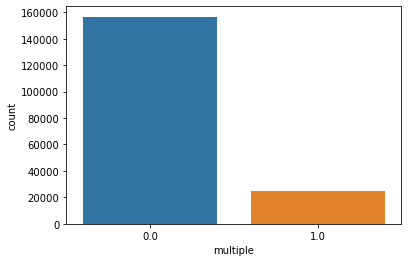

In [52]:
#no. of attacks which were part of multiple incidents
sns.countplot(data["multiple"])

<IPython.core.display.Javascript object>

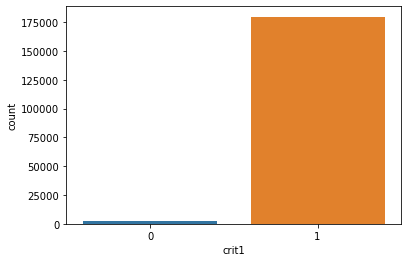

In [53]:
#inclusion criteria of attack
sns.countplot(data["crit1"])